In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

test_type = ""

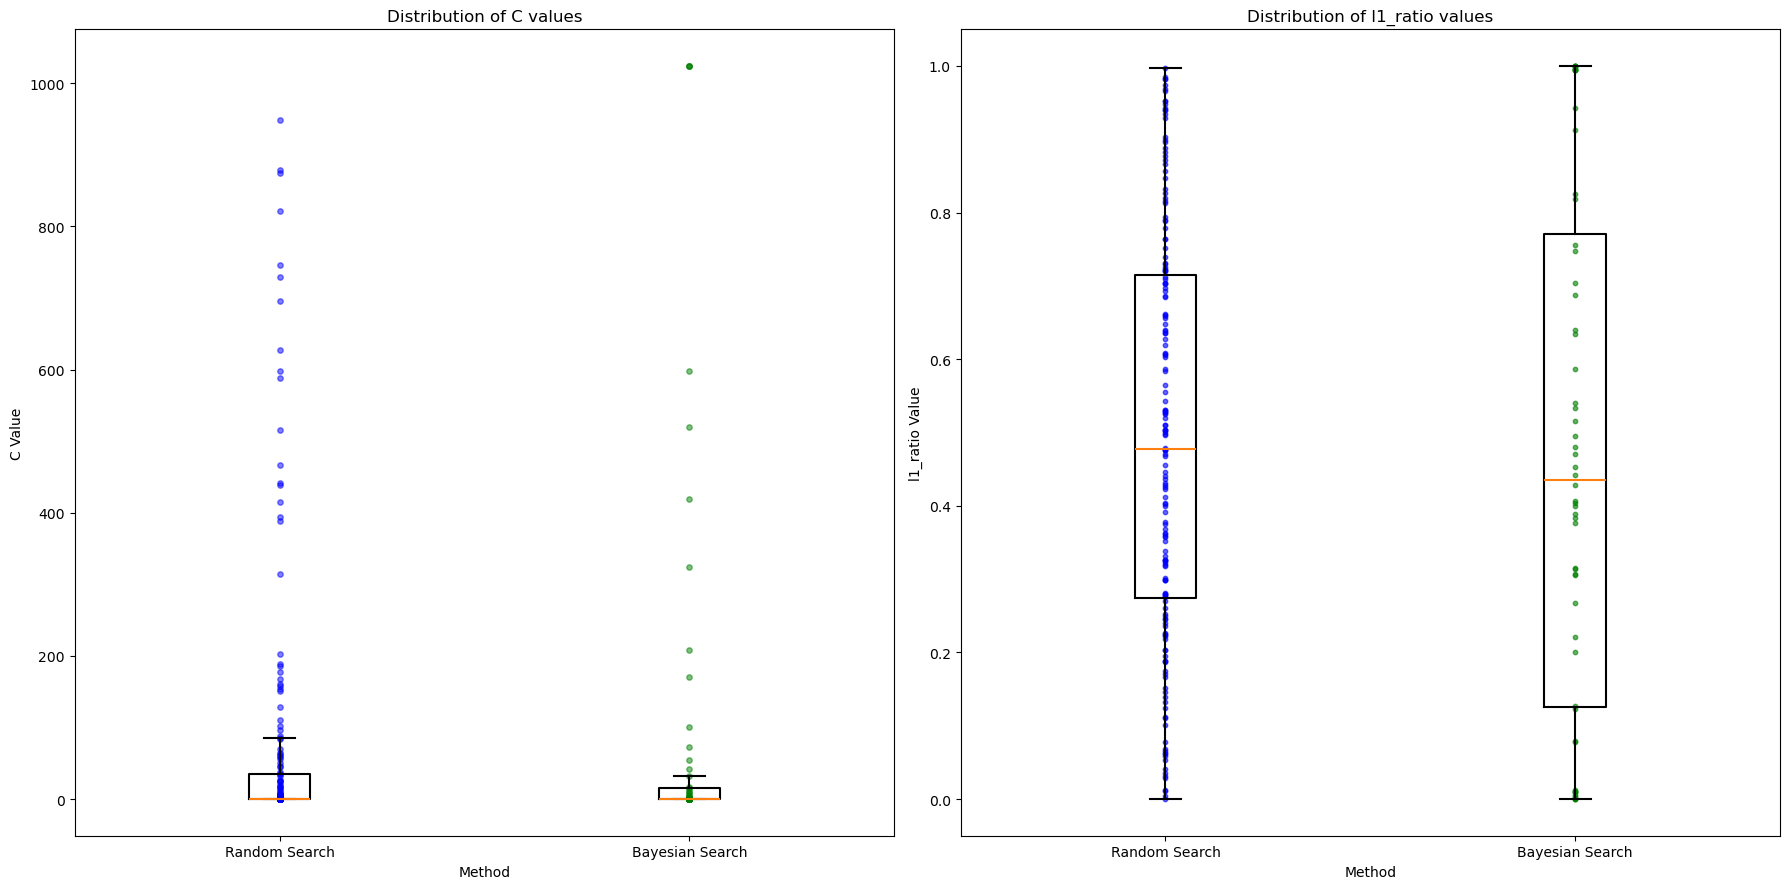

In [2]:
random_results = pd.read_csv(f"_random_iter_res_0.csv", index_col=0)
bayes_results = pd.read_csv(f"_bayes_iter_res_0.csv", index_col=0)

random_C = random_results['param_model__C']
bayes_C = bayes_results['param_model__C']

random_l1_ratio = random_results['param_model__l1_ratio']
bayes_l1_ratio = bayes_results['param_model__l1_ratio']

lw = 1.5  # line width for boxplot
sz = 15  # point size
al = 0.5  # transparency
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

axes[0].boxplot(
    [random_C, bayes_C],
    tick_labels=['Random Search', 'Bayesian Search'],
    boxprops=dict(linewidth=lw),
    whiskerprops=dict(linewidth=lw),
    capprops=dict(linewidth=lw),
    medianprops=dict(linewidth=lw),
    showfliers=False
)
axes[0].set_title('Distribution of C values')
axes[0].set_xlabel('Method')
axes[0].set_ylabel('C Value')
axes[0].scatter([1] * len(random_C), random_C, alpha=al, color='blue', s=sz, label='Random Search Points')
axes[0].scatter([2] * len(bayes_C), bayes_C, alpha=al, color='green', s=sz, label='Bayesian Search Points')

axes[1].boxplot(
    [random_l1_ratio, bayes_l1_ratio],
    tick_labels=['Random Search', 'Bayesian Search'],
    boxprops=dict(linewidth=lw),
    whiskerprops=dict(linewidth=lw),
    capprops=dict(linewidth=lw),
    medianprops=dict(linewidth=lw),
    showfliers=False
)
axes[1].set_title('Distribution of l1_ratio values')
axes[1].set_xlabel('Method')
axes[1].set_ylabel('l1_ratio Value')
axes[1].scatter([1] * len(random_l1_ratio), random_l1_ratio, alpha=0.6, color='blue', s=10, label='Random Search Points')
axes[1].scatter([2] * len(bayes_l1_ratio), bayes_l1_ratio, alpha=0.6, color='green', s=10, label='Bayesian Search Points')

plt.tight_layout()
plt.show()

In [3]:
file_list = [f"_random_iter_res_{i}.csv" for i in range(4)] 

dfs = []
for file in file_list:
    df = pd.read_csv(file, index_col=0)
    df['mean_test_score'] = -df['mean_test_score']
    
    mean = df['mean_test_score'].mean()
    std = df['mean_test_score'].std()
    min_score = df['mean_test_score'].min()
    max_score = df['mean_test_score'].max()
    
    df['mean_test_score_01'] = (df['mean_test_score'] - min_score) / (max_score - min_score)
    df['mean_test_score_std'] = (df['mean_test_score'] - mean) / std
    
    dfs.append(df)

mean_test_score = [df['mean_test_score'] for df in dfs]
mean_test_score_01 = [df['mean_test_score_01'] for df in dfs]
mean_test_score_std = [df['mean_test_score_std'] for df in dfs]

scores_df = pd.concat(mean_test_score + mean_test_score_01 + mean_test_score_std, axis=1)

scores_df.columns = [f"mean_test_score_{i}" for i in range(len(file_list))] + \
                    [f"mean_test_score_01_{i}" for i in range(len(file_list))] + \
                    [f"mean_test_score_std_{i}" for i in range(len(file_list))]

scores_df['mean_of_mean_test_score'] = scores_df[[f"mean_test_score_{i}" for i in range(len(file_list))]].mean(axis=1)
scores_df['mean_of_mean_test_score_01'] = scores_df[[f"mean_test_score_01_{i}" for i in range(len(file_list))]].mean(axis=1)
scores_df['mean_of_mean_test_score_std'] = scores_df[[f"mean_test_score_std_{i}" for i in range(len(file_list))]].mean(axis=1)

C:\Users\Bakaczor\AppData\Local\Temp\ipykernel_18408\770713294.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([rs_data, bs_data], labels=['Random Search', 'Bayes Search'],
C:\Users\Bakaczor\AppData\Local\Temp\ipykernel_18408\770713294.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([rs_data, bs_data], labels=['Random Search', 'Bayes Search'],
C:\Users\Bakaczor\AppData\Local\Temp\ipykernel_18408\770713294.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([rs_data, bs_data], labels=['Random Search', 'Bayes Search'],


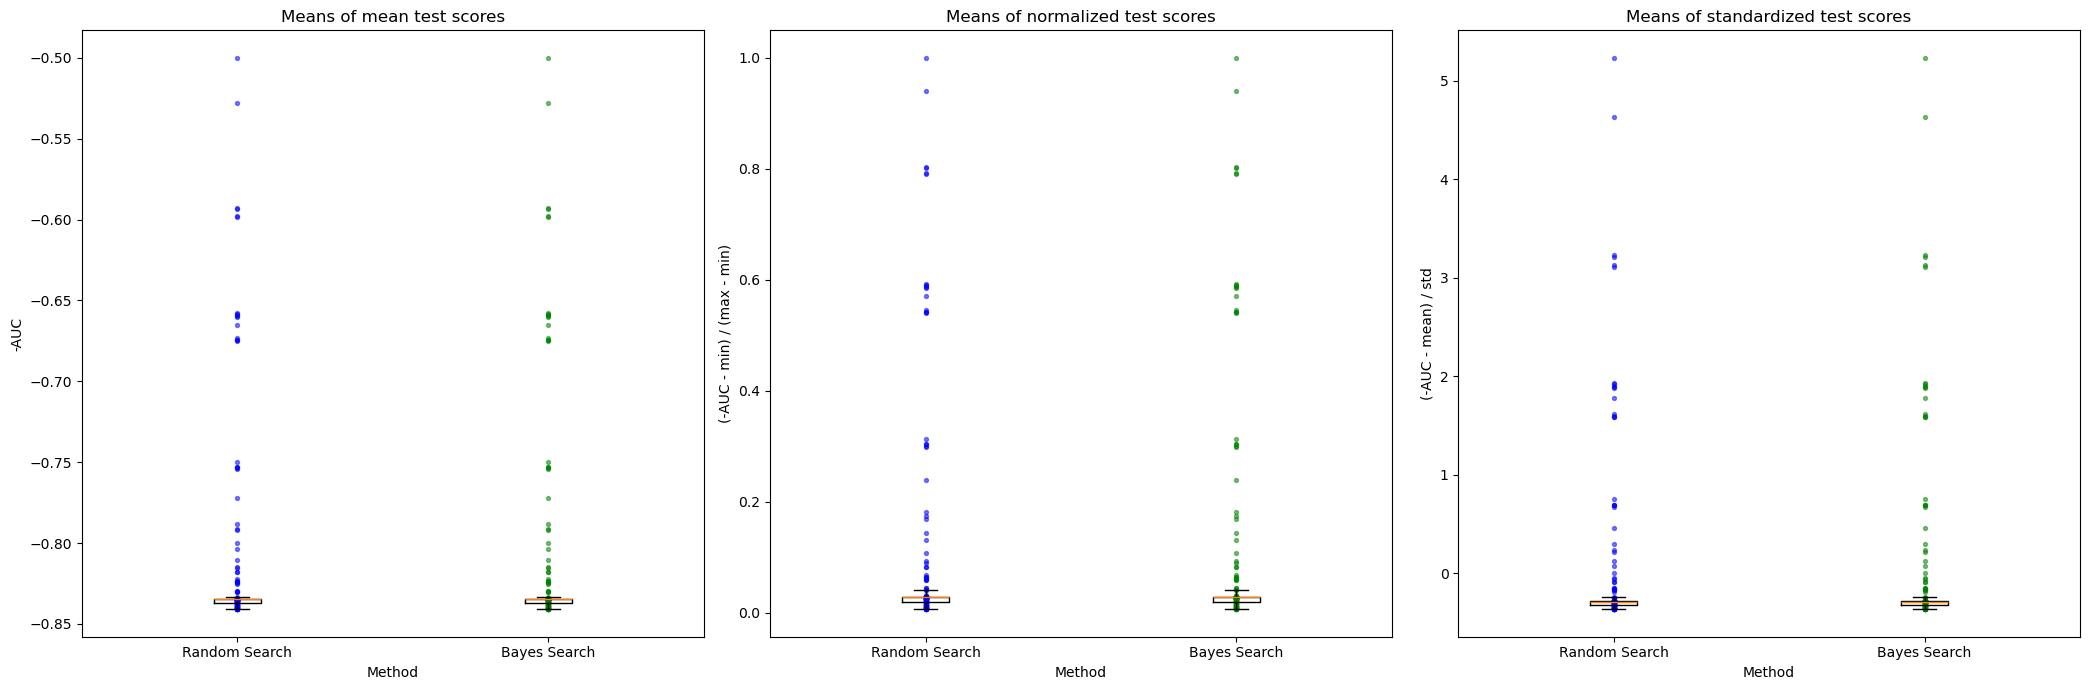

In [4]:
random_search_df = scores_df[['mean_of_mean_test_score', 'mean_of_mean_test_score_01', 'mean_of_mean_test_score_std']].copy()
random_search_df['method'] = 'rs'

bayes_search_df = scores_df[['mean_of_mean_test_score', 'mean_of_mean_test_score_01', 'mean_of_mean_test_score_std']].copy()
bayes_search_df['method'] = 'bs'

plot_data = pd.concat([random_search_df, bayes_search_df], axis=0)
score_types = ['mean_of_mean_test_score', 'mean_of_mean_test_score_01', 'mean_of_mean_test_score_std']

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=False)
lw = 1  # line width for boxplot
sz = 8  # point size
al = 0.5  # transparency
titles = ['Means of mean test scores', 'Means of normalized test scores', 'Means of standardized test scores']
ylabels = ['-AUC', '(-AUC - min) / (max - min)', '(-AUC - mean) / std']

for i, score_type in enumerate(score_types):
    rs_data = plot_data[plot_data['method'] == 'rs'][score_type]
    bs_data = plot_data[plot_data['method'] == 'bs'][score_type]
    
    axes[i].boxplot([rs_data, bs_data], labels=['Random Search', 'Bayes Search'],
                    boxprops=dict(linewidth=lw),
                    whiskerprops=dict(linewidth=lw),
                    capprops=dict(linewidth=lw),
                    medianprops=dict(linewidth=lw),
                    showfliers=False)
    

    axes[i].scatter([1] * len(rs_data), rs_data, alpha=al, color='blue', s=sz, label='Random Search Points')
    axes[i].scatter([2] * len(bs_data), bs_data, alpha=al, color='green', s=sz, label='Bayesian Search Points')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Method")
    axes[i].set_ylabel(ylabels[i])

plt.tight_layout()
plt.show()

In [19]:
ids = [100, 140]

r_file_list = [f"_random_iter_res_{i}.csv" for i in range(4)]
b_file_list = [f"_bayes_iter_res_{i}.csv" for i in range(4)]

r_diffs_dfs = []
b_diffs_dfs = []
for row_id in ids:
    diffs = []
    for file in r_file_list:
        df = pd.read_csv(file, index_col=0)
        mean_test_score_row_id = -df.loc[row_id, 'mean_test_score']
        diff = mean_test_score_row_id + df['mean_test_score']
        diffs.append(diff)
    
    diffs_df = pd.DataFrame(np.array(diffs).T, columns=[f"diff_{i}" for i in range(len(diffs))])
    r_diffs_dfs.append(diffs_df)
    
    diffs = []    
    for file in b_file_list:
        df = pd.read_csv(file, index_col=0)
        # we already have the default value
        diff = mean_test_score_row_id + df['mean_test_score']
        diffs.append(diff)
        
    diffs_df = pd.DataFrame(np.array(diffs).T, columns=[f"diff_{i}" for i in range(len(diffs))])
    b_diffs_dfs.append(diffs_df)


random_means_df = pd.DataFrame(columns=['means_100', 'means_140'])
random_means_df['means_100'] = r_diffs_dfs[0][[f"diff_{i}" for i in range(len(file_list))]].mean(axis=1)
random_means_df['means_140'] = r_diffs_dfs[1][[f"diff_{i}" for i in range(len(file_list))]].mean(axis=1)

bayes_means_df = pd.DataFrame(columns=['means_100', 'means_140'])
bayes_means_df['means_100'] = b_diffs_dfs[0][[f"diff_{i}" for i in range(len(file_list))]].mean(axis=1)
bayes_means_df['means_140'] = b_diffs_dfs[1][[f"diff_{i}" for i in range(len(file_list))]].mean(axis=1)

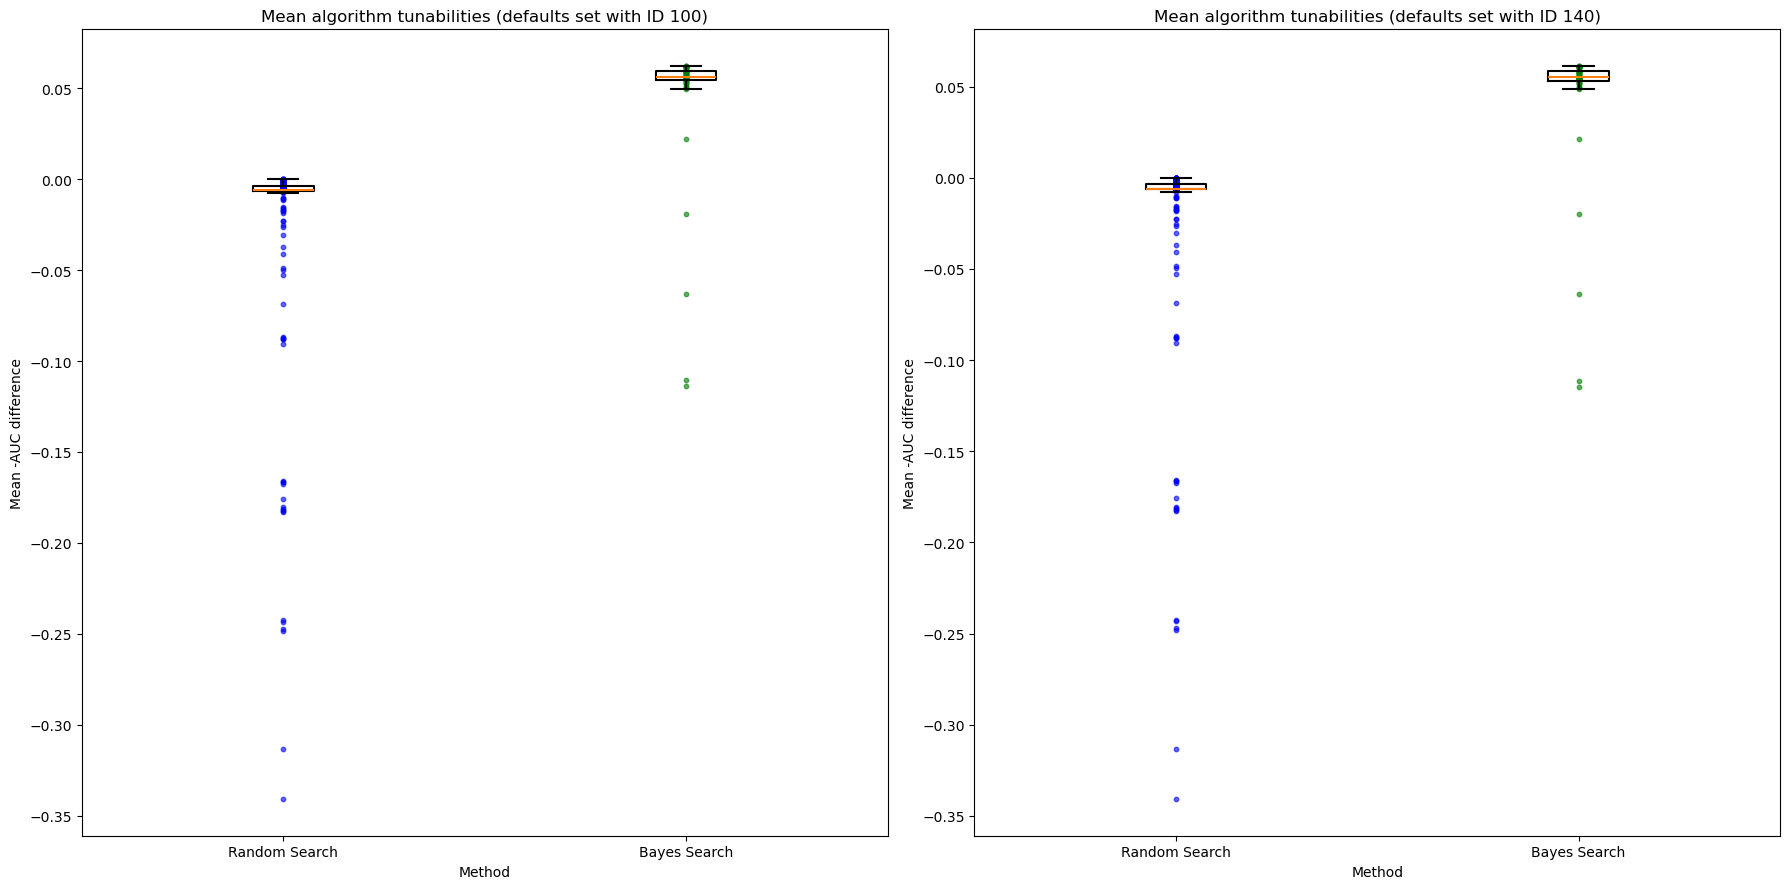

In [20]:
lw = 1.5  # line width for boxplot
sz = 15  # point size
al = 0.5  # transparency
fig, axes = plt.subplots(1, 2, figsize=(18, 9), sharey=False)

axes[0].boxplot(
    [random_means_df['means_100'], bayes_means_df['means_100']],
    tick_labels=['Random Search', 'Bayes Search'],
    boxprops=dict(linewidth=lw),
    whiskerprops=dict(linewidth=lw),
    capprops=dict(linewidth=lw),
    medianprops=dict(linewidth=lw),
    showfliers=False
)
axes[0].set_title("Mean algorithm tunabilities (defaults set with ID 100)")
axes[0].set_xlabel('Method')
axes[0].set_ylabel('Mean -AUC difference')
axes[0].scatter([1] * len(random_means_df['means_100']), random_means_df['means_100'], alpha=0.6, color='blue', s=10, label='Random Search Points')
axes[0].scatter([2] * len(bayes_means_df['means_100']), bayes_means_df['means_100'], alpha=0.6, color='green', s=10, label='Bayesian Search Points')

axes[1].boxplot(
    [random_means_df['means_140'], bayes_means_df['means_140']],
    tick_labels=['Random Search', 'Bayes Search'],
    boxprops=dict(linewidth=lw),
    whiskerprops=dict(linewidth=lw),
    capprops=dict(linewidth=lw),
    medianprops=dict(linewidth=lw),
    showfliers=False
)
axes[1].set_title("Mean algorithm tunabilities (defaults set with ID 140)")
axes[1].set_xlabel('Method')
axes[1].set_ylabel('Mean -AUC difference')
axes[1].scatter([1] * len(random_means_df['means_140']), random_means_df['means_140'], alpha=0.6, color='blue', s=10, label='Random Search Points')
axes[1].scatter([2] * len(bayes_means_df['means_140']), bayes_means_df['means_140'], alpha=0.6, color='green', s=10, label='Bayesian Search Points')

plt.tight_layout()
plt.show()